<h1 align = "center">Poverty Prediction Through Machine Learning</h1>

## Dataset Description

| Dataset Attributes | Description |
| ------------------ | ----------- |
| country | Name of the country |
| child_mort | Death of children under 5 years of age per 100 live birth |
| exports | Exports of goods and services per capita. Given as % age of the GDP per capita|
| health | Total health spending per capita. Given as % age of GDP per capita |
| imports | Imports of goods and services per capita. Given as % age of the GDP per capita |
| income | Net income per person |
| inflation | The measurement of the annual growth rate of the Total GDP |
| life_expec | The average number of years a new bornchild would live if the current mortality patterns are to remain the same|
| total_fer | The numberofchildren that would be born to each woman if the current age-fertility rates remain the same |
| gdpp | The GDPpercapita. Calculated as the Total GDP divided by the total population |

# Import the Basic library

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Ignore all warnings

In [2]:
df = pd.read_csv(r"C:\Users\vach\Desktop\skill build\Country-data.csv")

In [3]:
# display the dataset
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# check the data shape
df.shape

(167, 10)

In [5]:
# check the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# check is there any null value
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# check the sum of null value
df.isnull().sum().sum()

0

<Axes: >

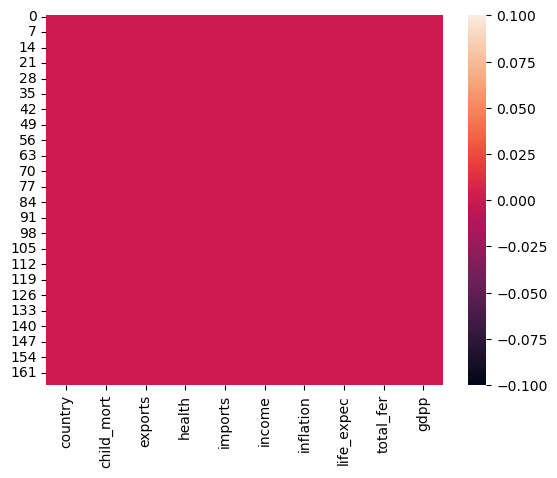

In [8]:
# Visualize the null value using heatmap
sns.heatmap(df.isnull())

In [9]:
# Check duplicated data
print(f"Number of dupilcated data: {df.duplicated().sum()}")

Number of dupilcated data: 0


# Exploratory Data Analysis (EDA)

In [11]:
# Show the detail dataset with int and float type
df.select_dtypes(include=['int64','float64']).describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [12]:
# show the detail dataset with object type
df.select_dtypes(include=['object']).describe()

country
count           167
unique          167
top     Afghanistan
freq              1

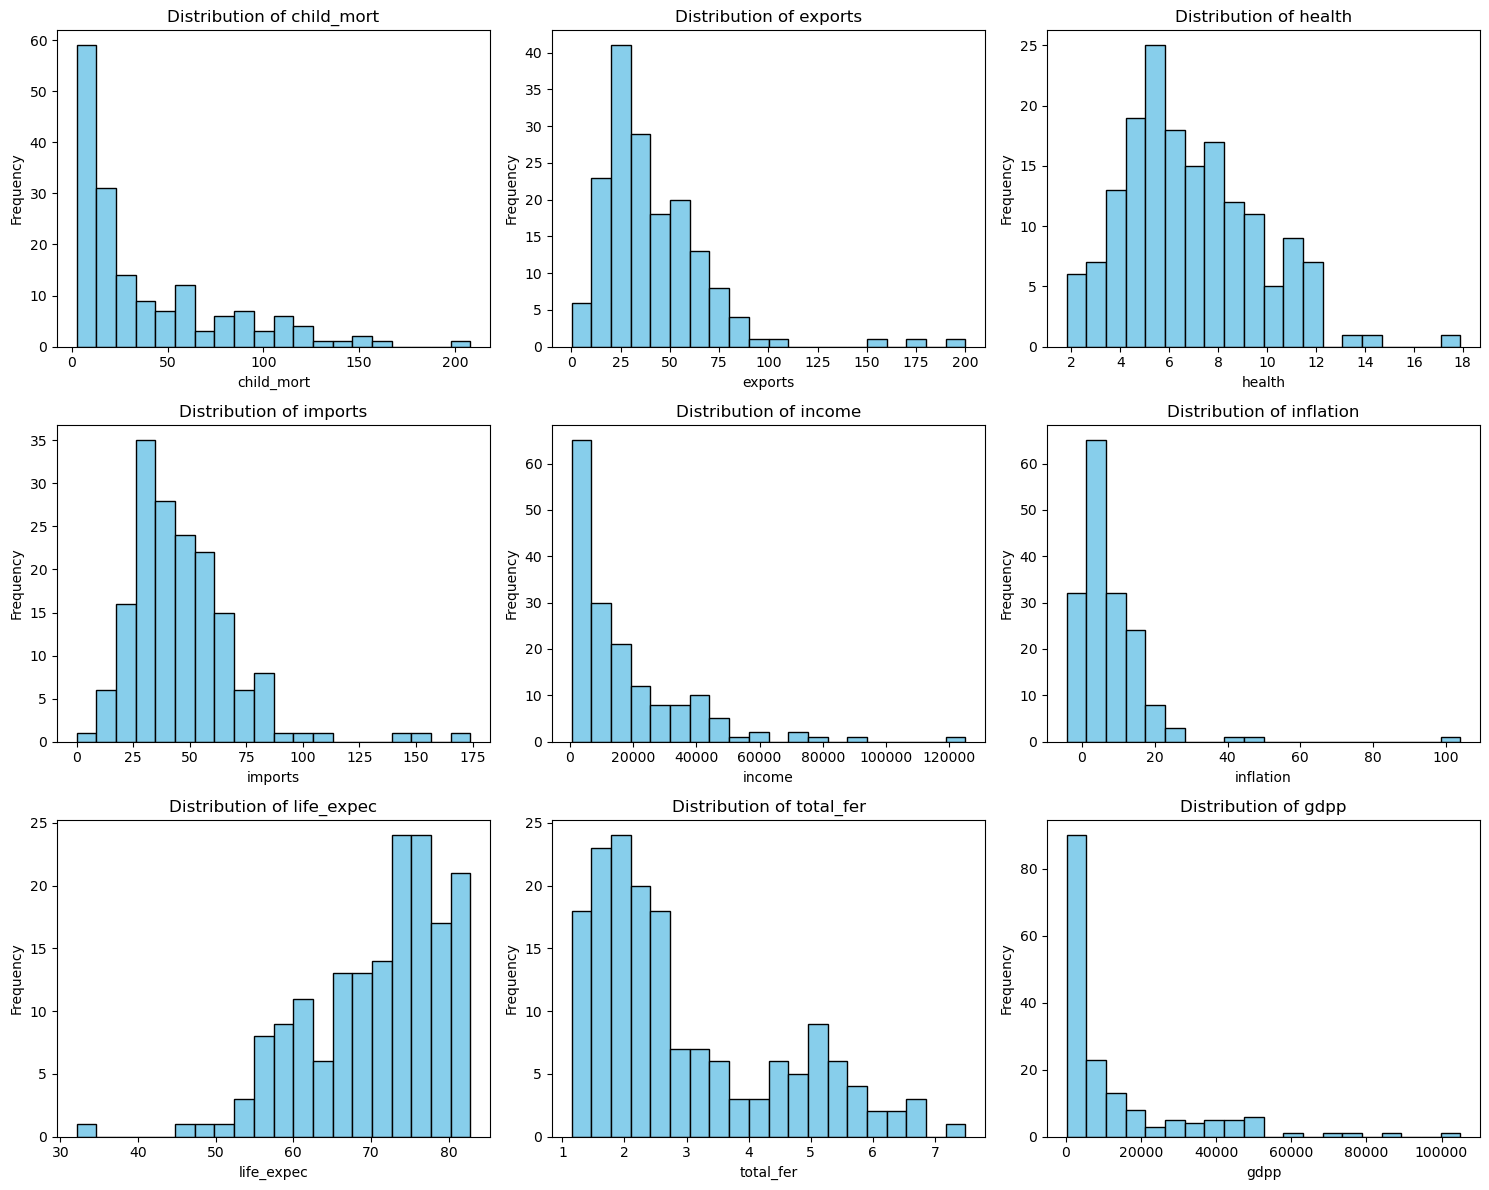

In [13]:
# Set up plotting for each column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure for multiple subplots
plt.figure(figsize=(15, 12))

# Plot a histogram for each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

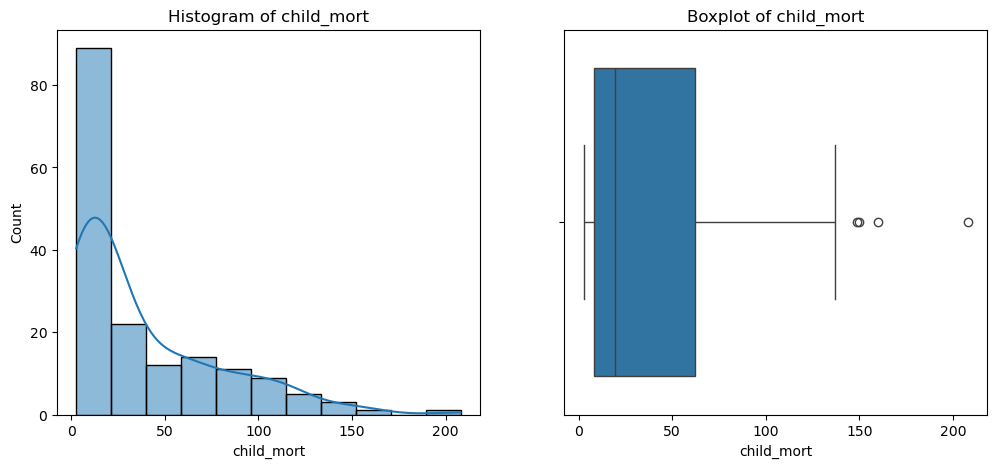

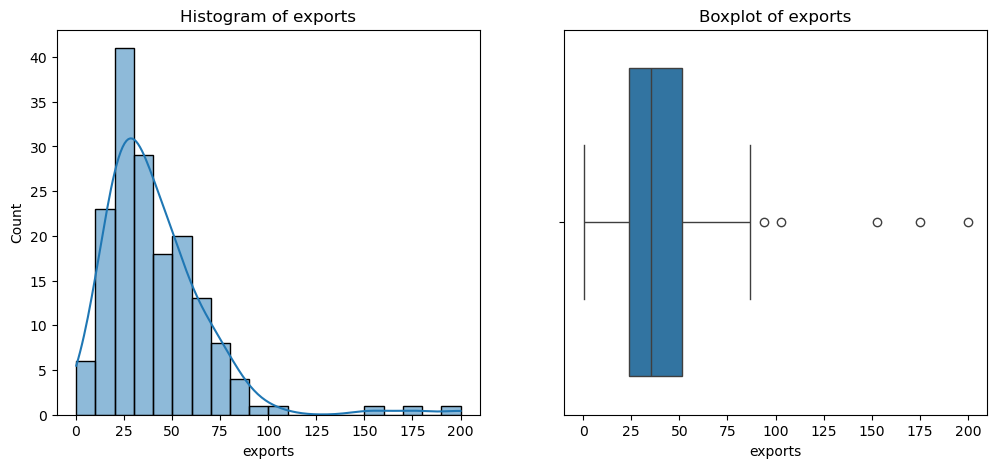

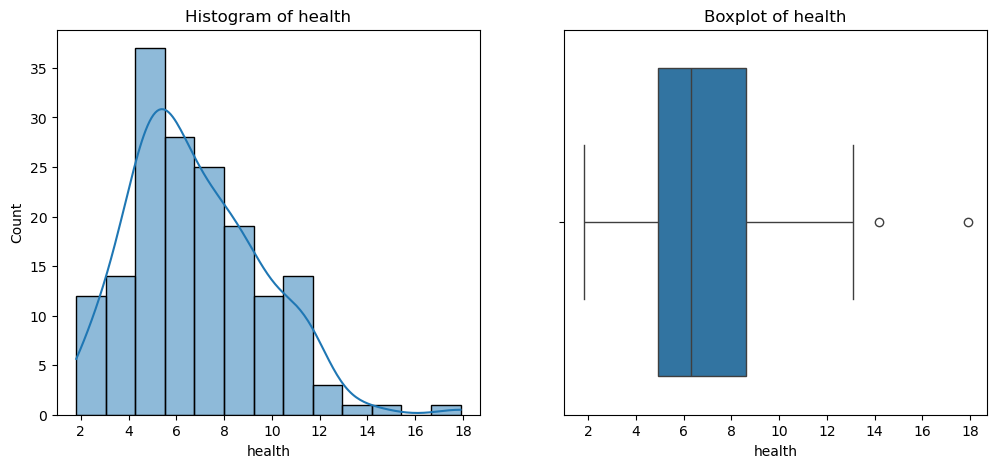

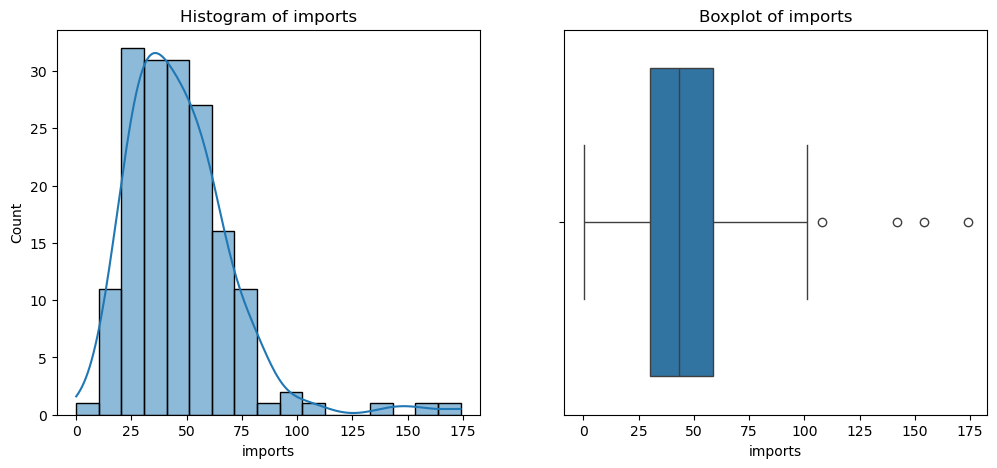

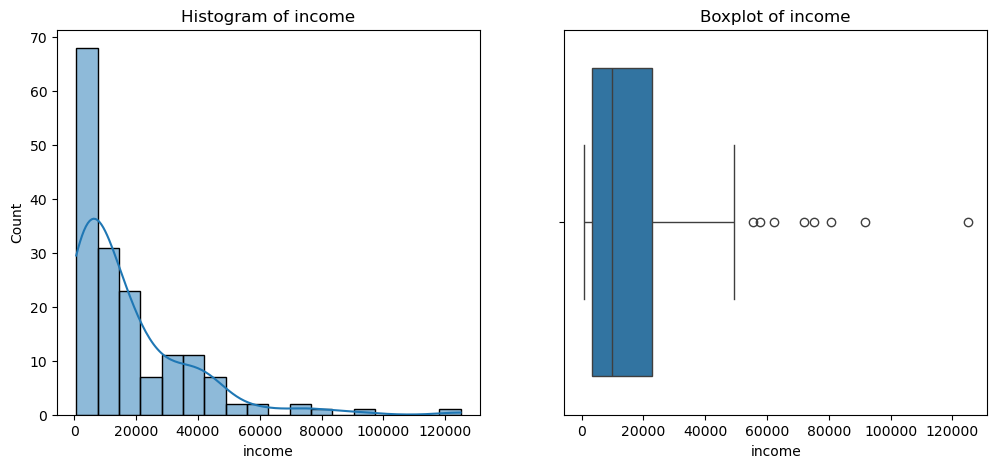

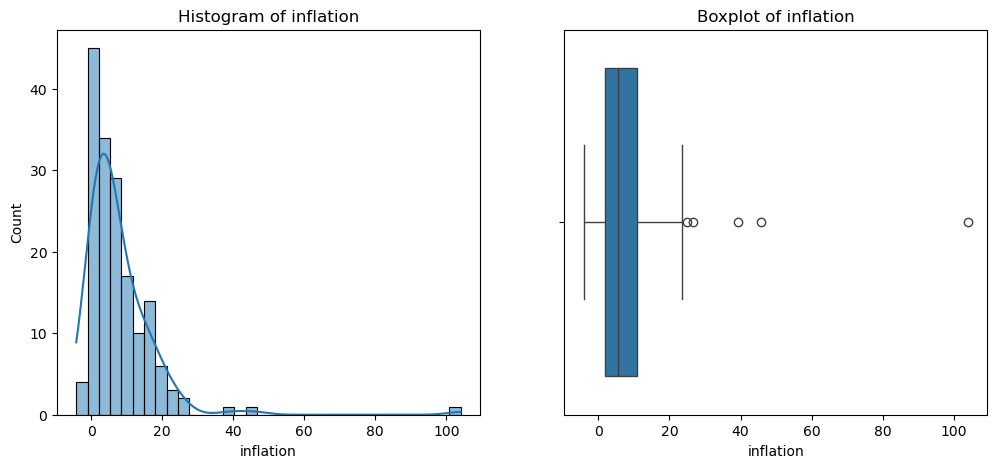

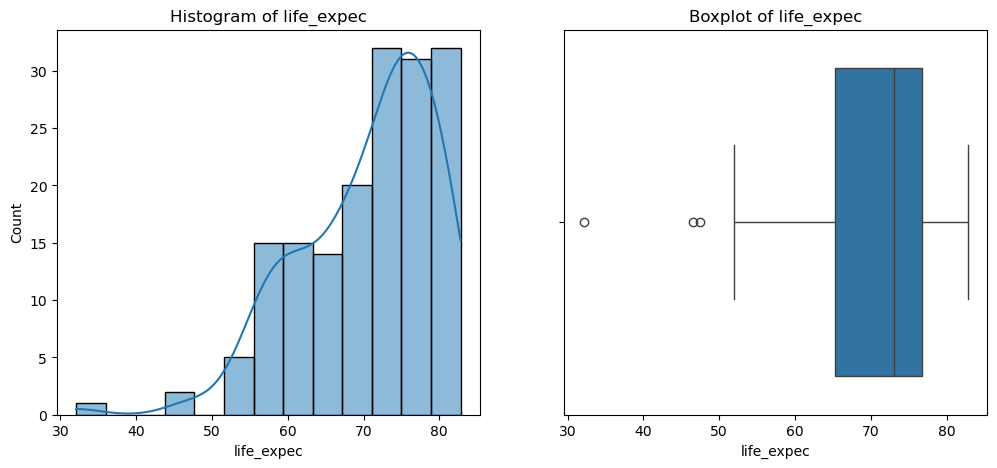

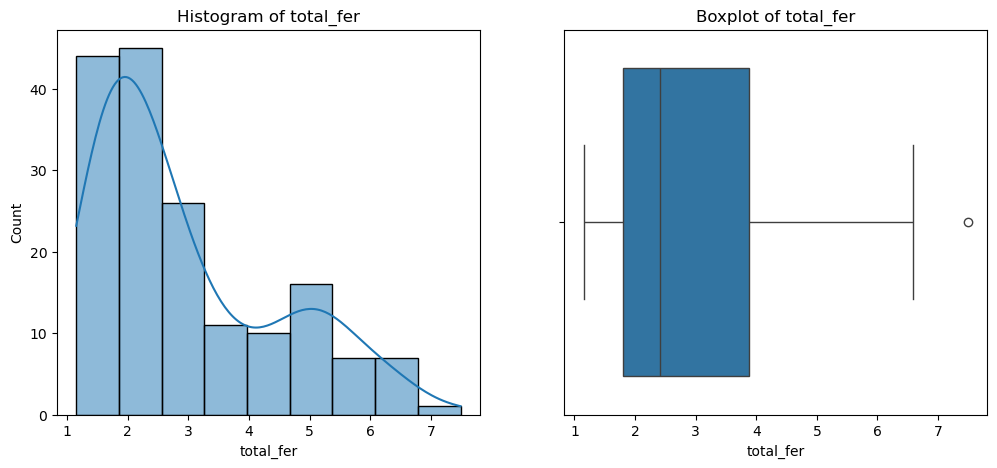

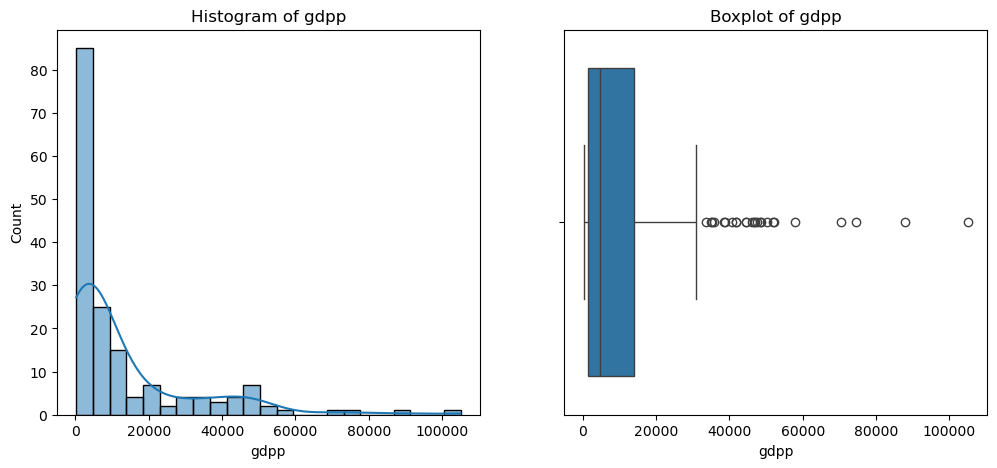

In [14]:
# Set up plotting for each column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot each numeric columns individually
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


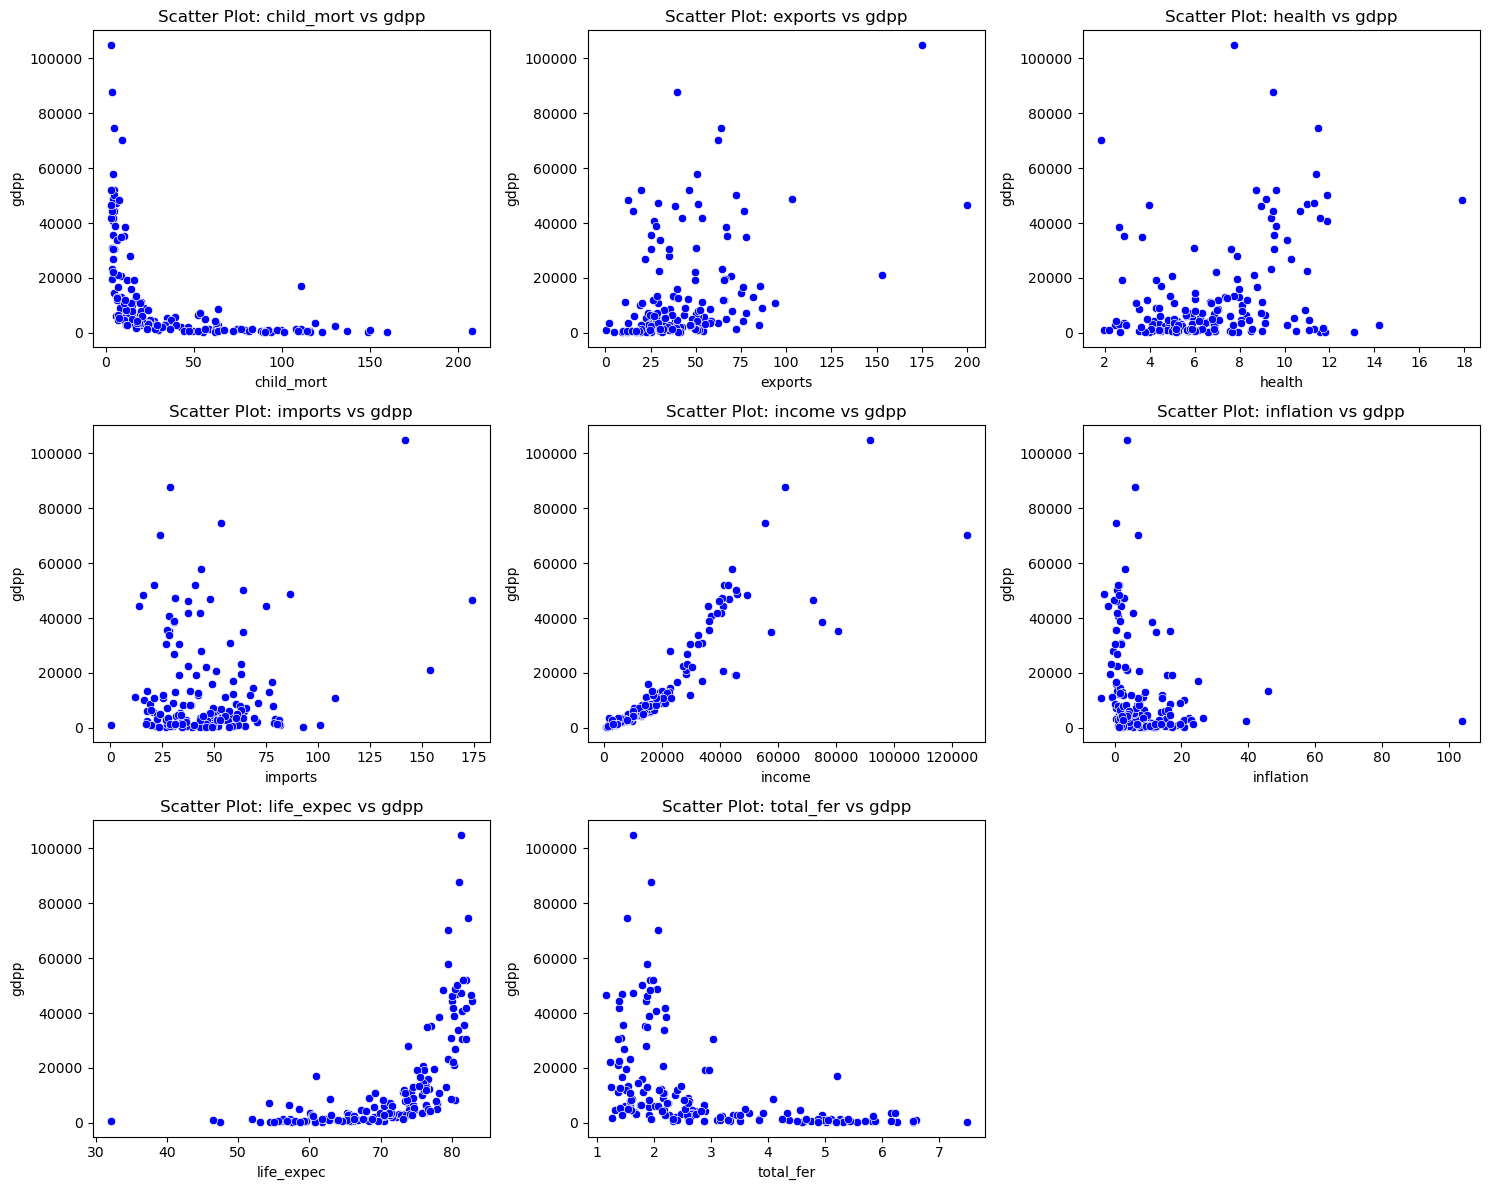

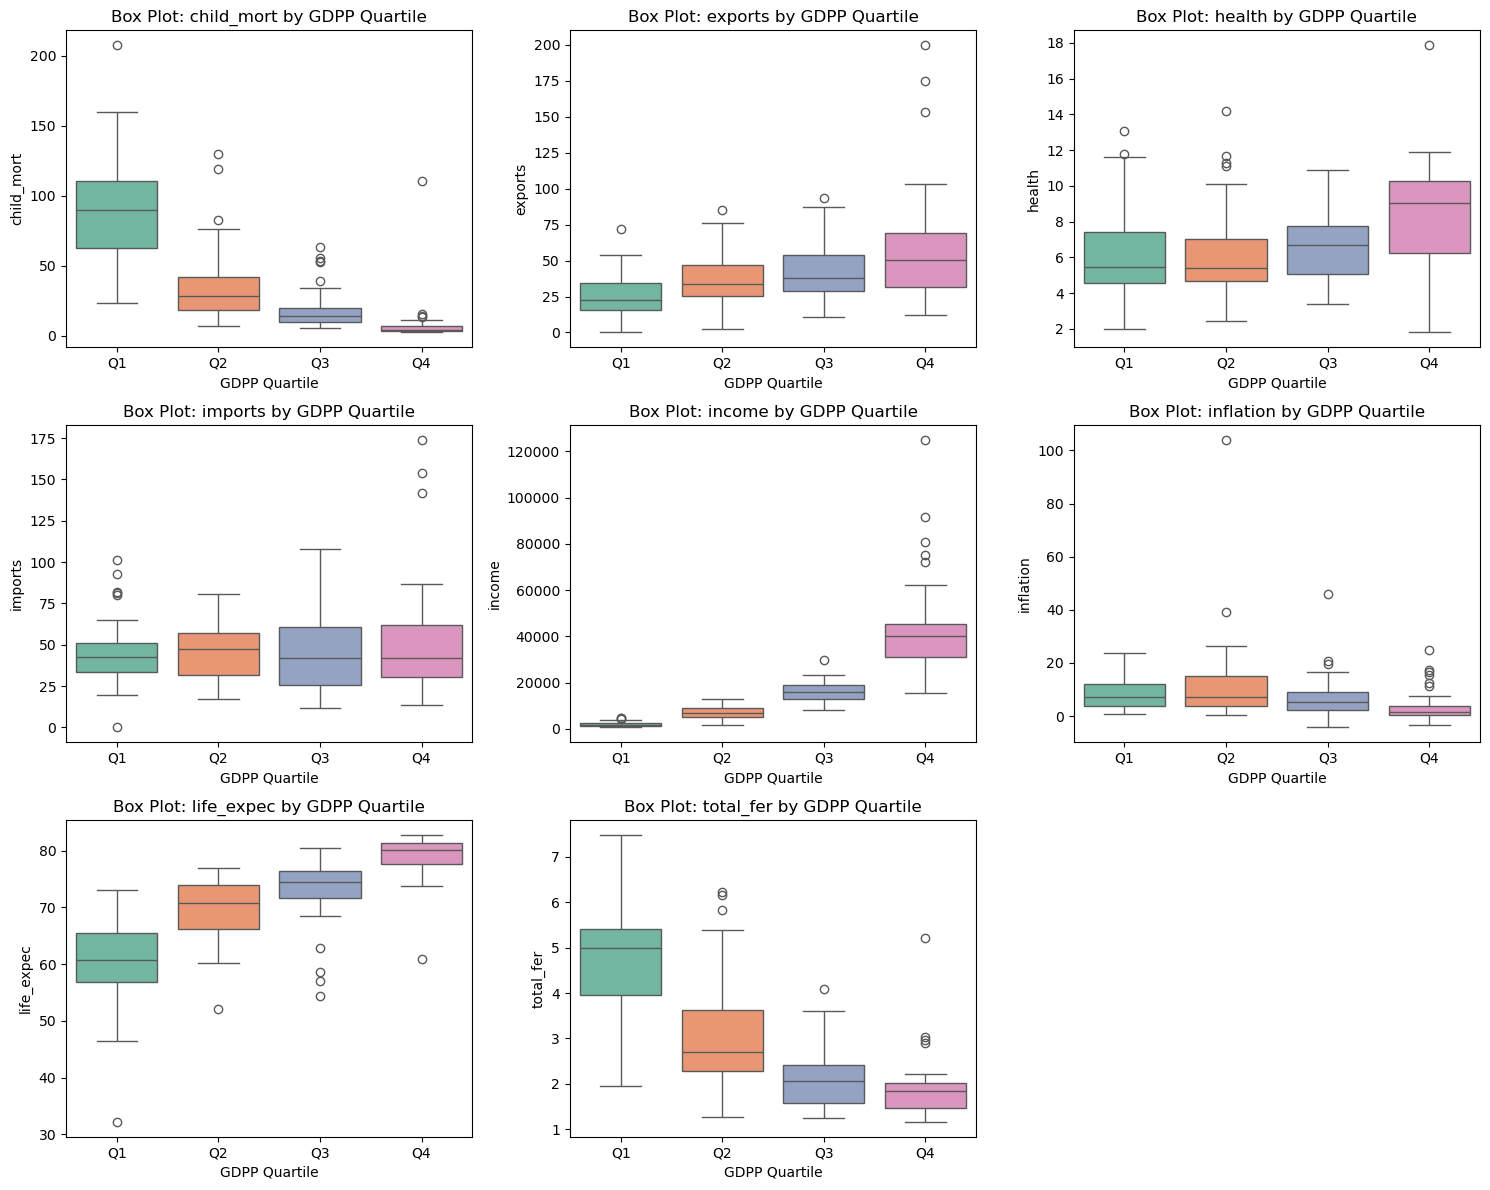

In [15]:
# The t variable is 'gdpp'
t_variable = 'gdpp'

# List of numerical features to explore relationships with the t variable
numerical_columns = ['child_mort', 'exports', 'health', 'imports', 
                     'income', 'inflation', 'life_expec', 'total_fer']

# Scatter Plots: Visualize relationships between each feature and the t variable
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y=t_variable, color='blue')
    plt.title(f'Scatter Plot: {col} vs {t_variable}')
    plt.xlabel(col)
    plt.ylabel(t_variable)

plt.tight_layout()
plt.show()

# Box Plots: Analyze distributions of each feature with respect to 'gdpp' quartiles

# Create gdpp quartiles for box plot analysis
df['gdpp_quartile'] = pd.qcut(df['gdpp'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='gdpp_quartile', y=col, palette='Set2')
    plt.title(f'Box Plot: {col} by GDPP Quartile')
    plt.xlabel('GDPP Quartile')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

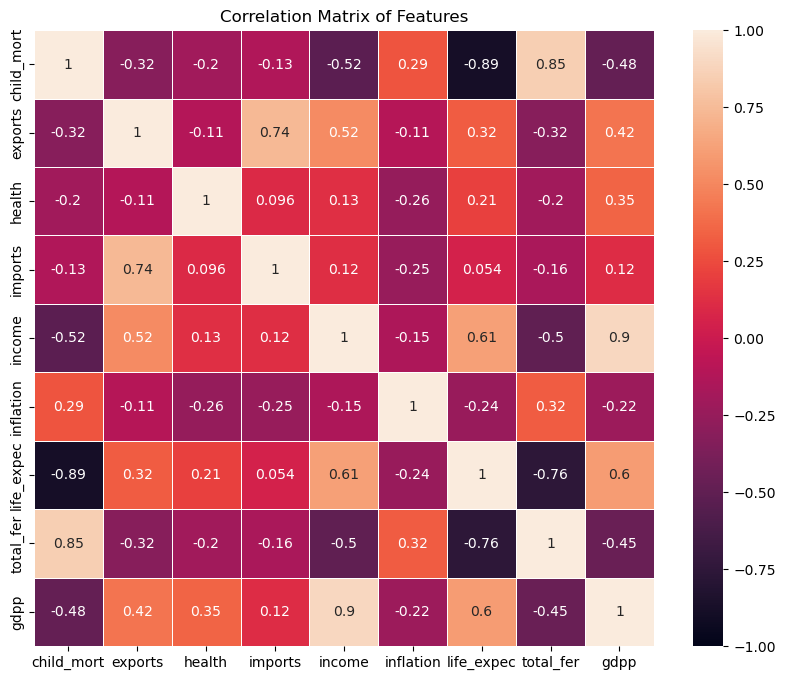

In [16]:
# Compute the correlation matrix for numerical columns

df1 = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer','gdpp']]
correlation_matrix = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a color gradient   
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

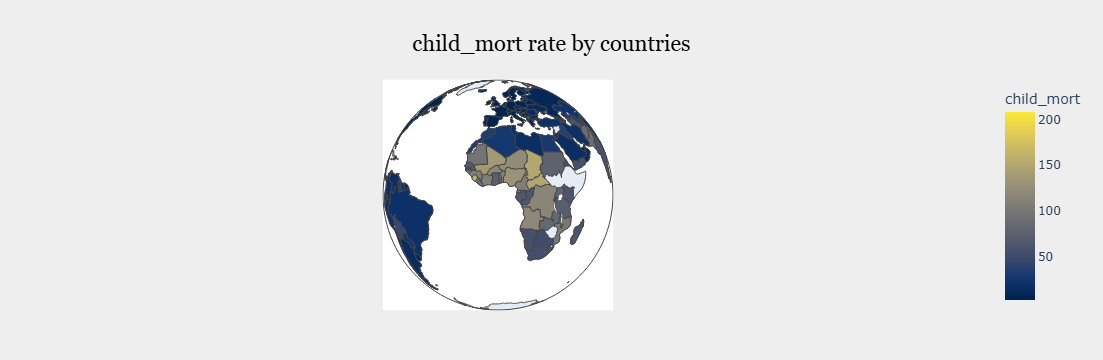

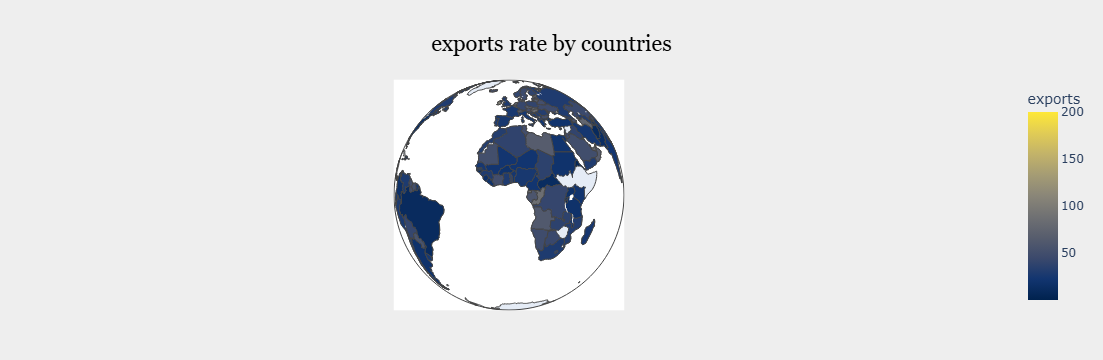

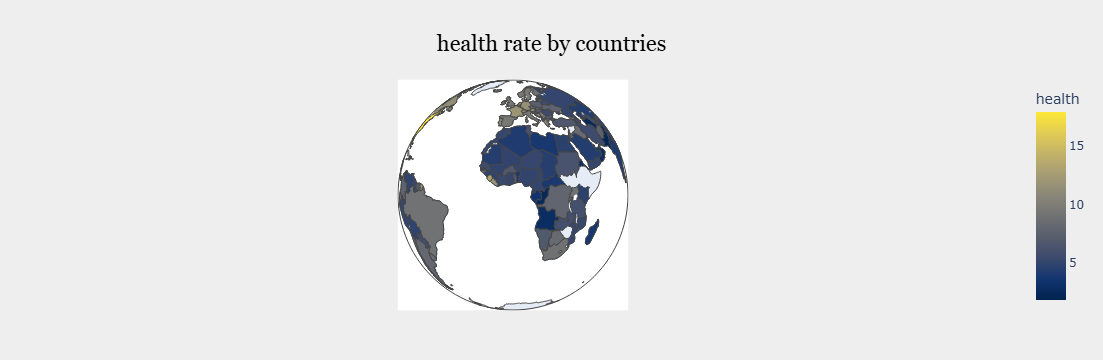

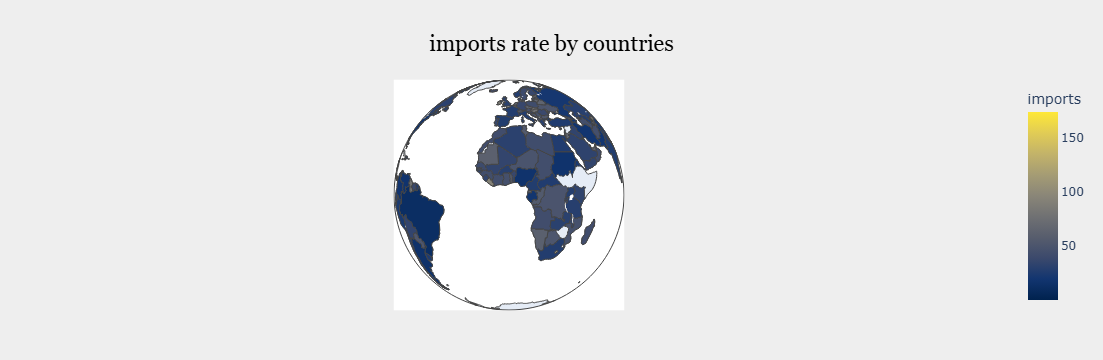

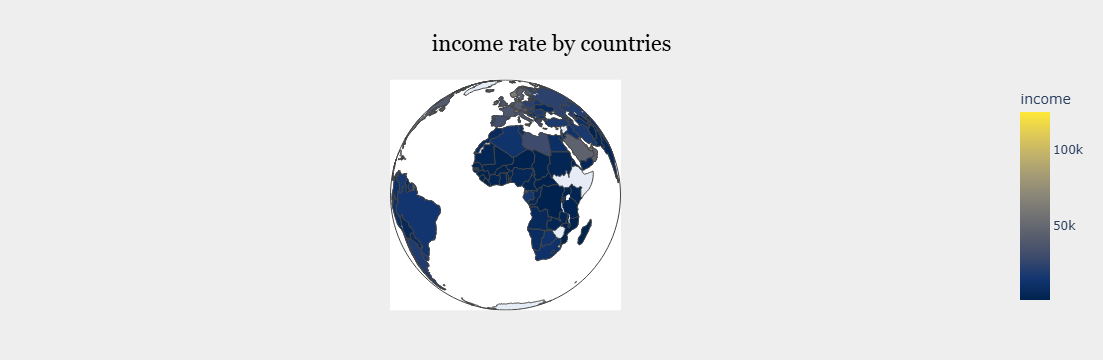

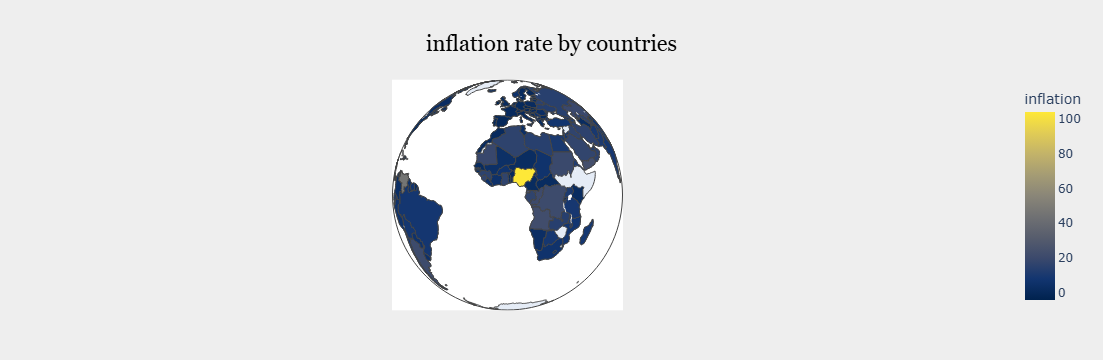

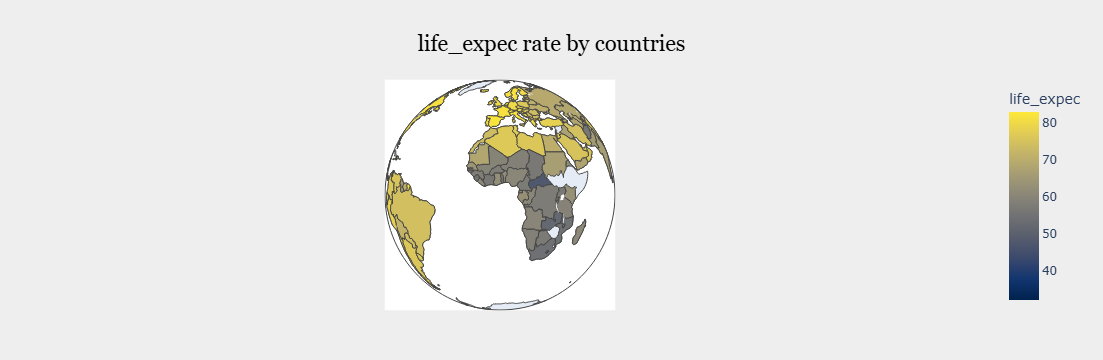

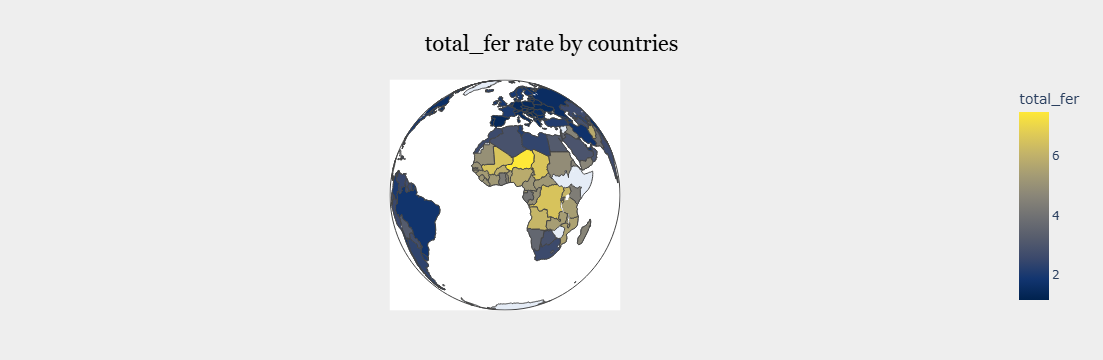

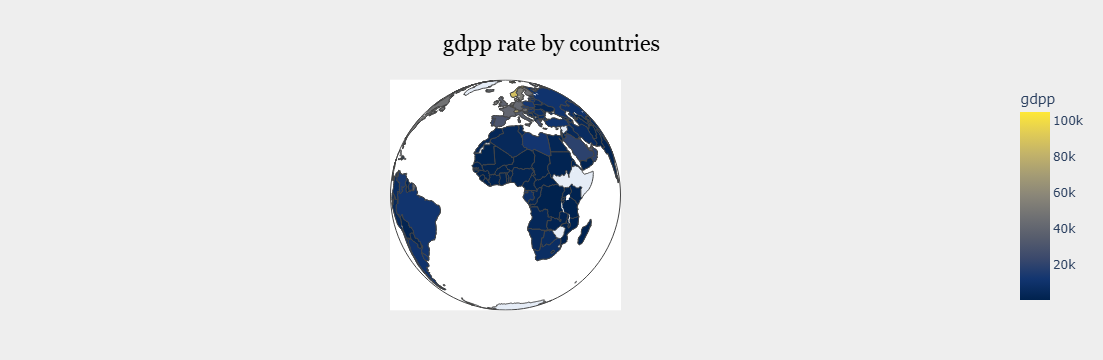

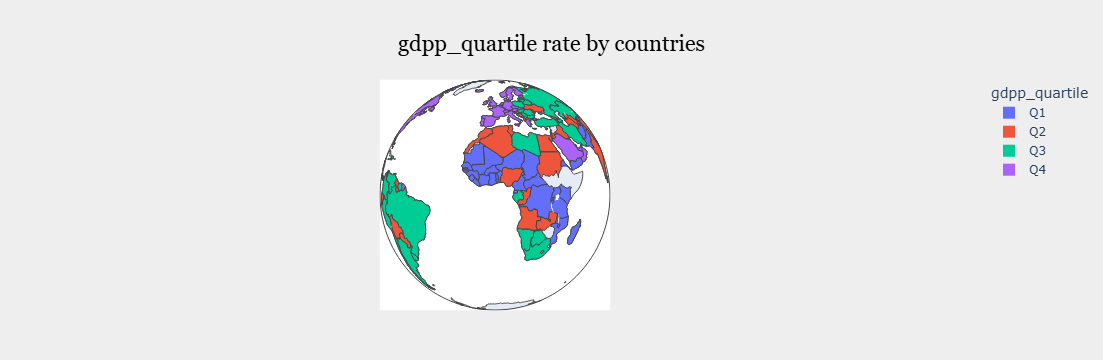

In [17]:
# The status of different features in each "country" using choropleth plot
import plotly.express as px

for i in df.columns[1:]:
    fig=px.choropleth(
        data_frame=df,
        locationmode='country names',
        locations='country',
        projection='orthographic',
        color_continuous_scale='Cividis',
        color=i,
        title=f'{i} rate by countries')
        
    fig.update_layout(
        margin={"r":20,"t":80,"l":20,"b":50},
        title=dict(
            y=0.9,
            x=0.5,
            xanchor= 'center',
            yanchor= 'top'
            ),
        titlefont=dict(
            family='Georgia',
            size=22,
            color='black',),
        paper_bgcolor='#eeeeee')

    fig.show()

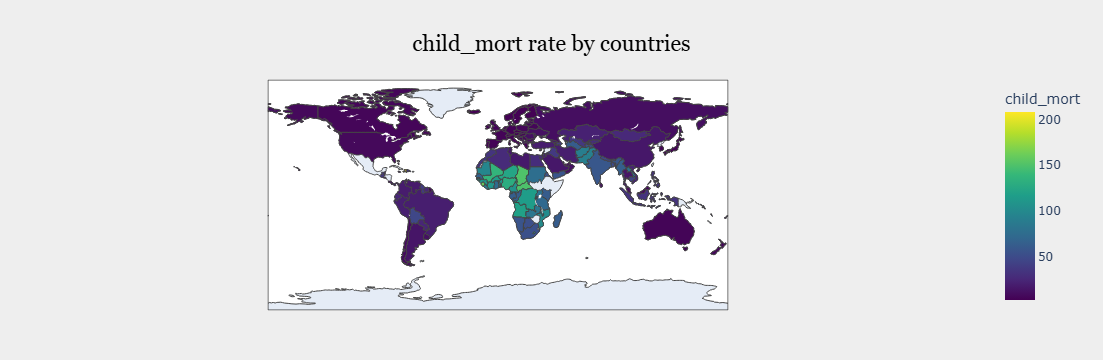

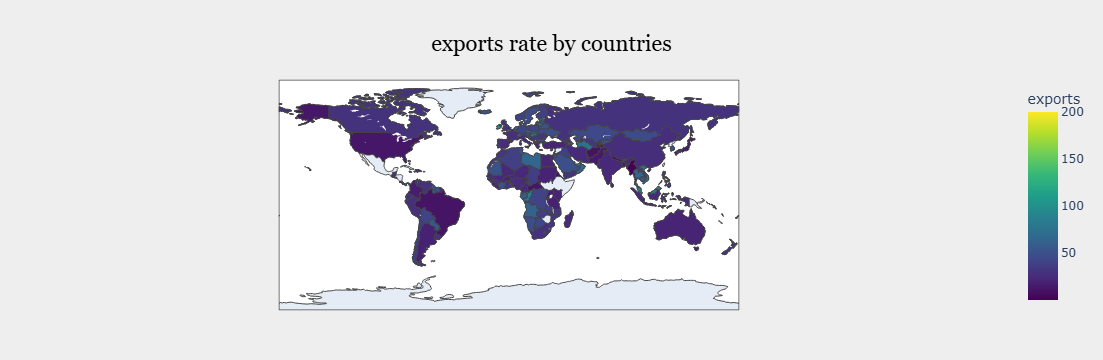

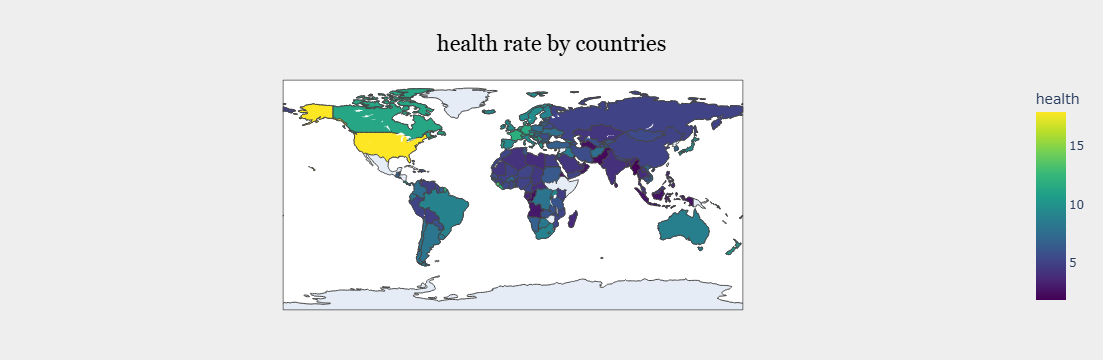

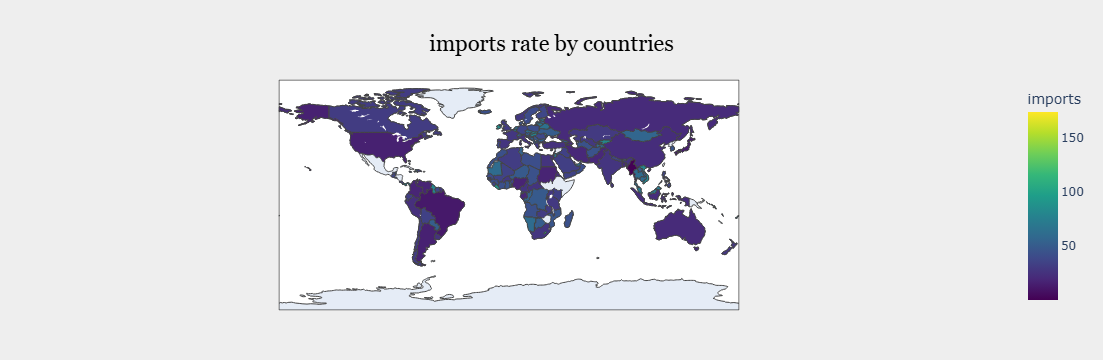

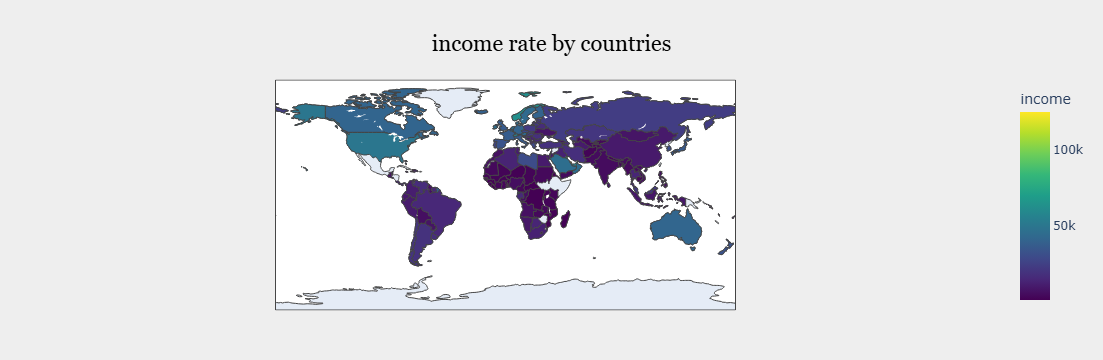

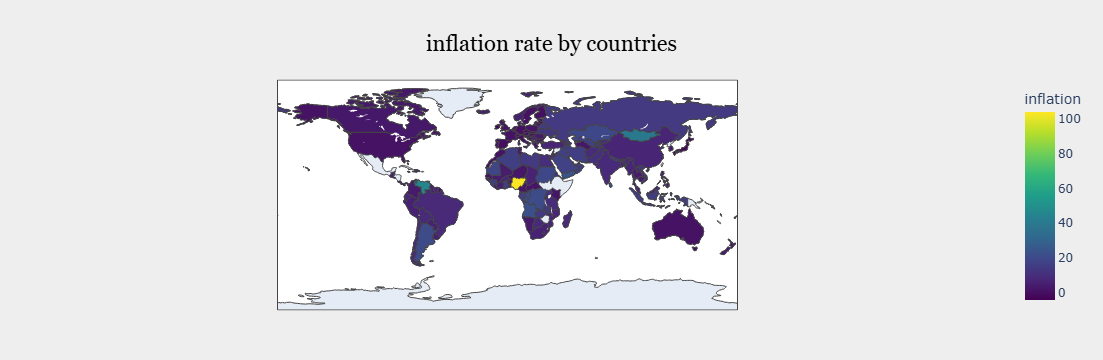

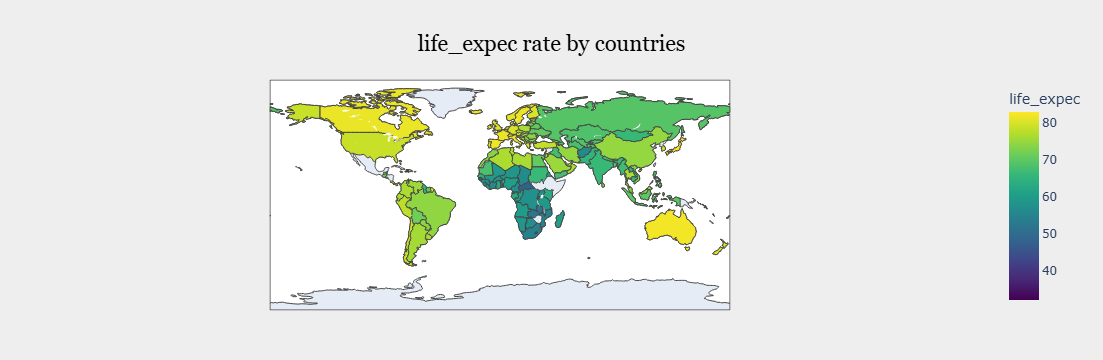

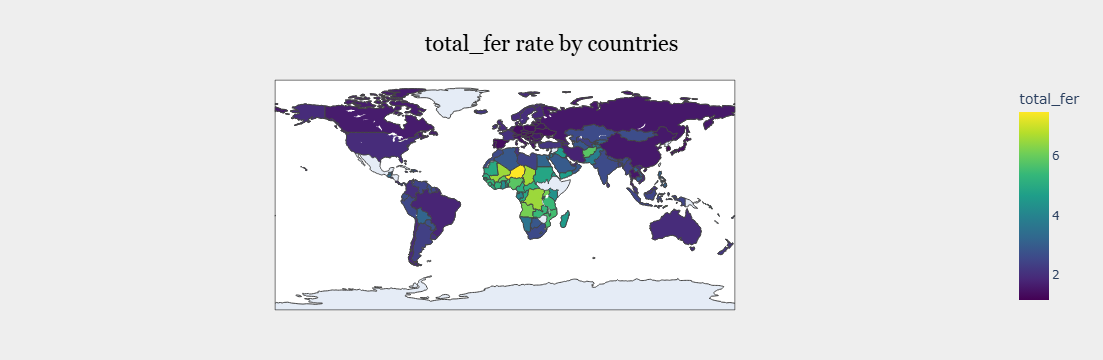

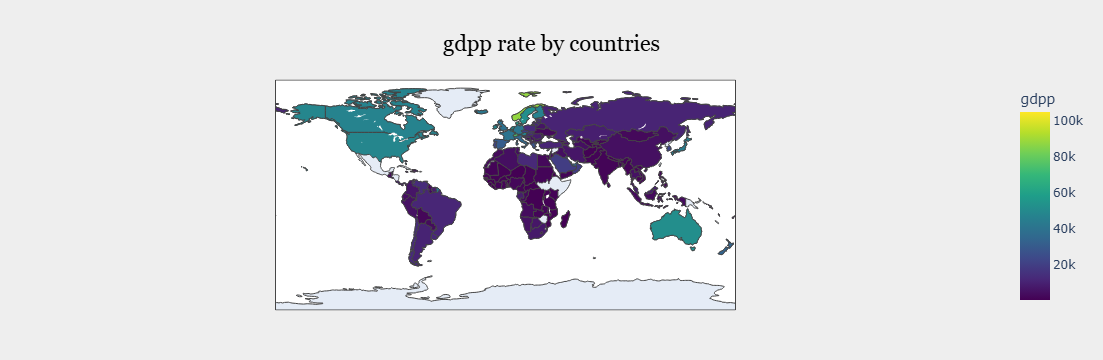

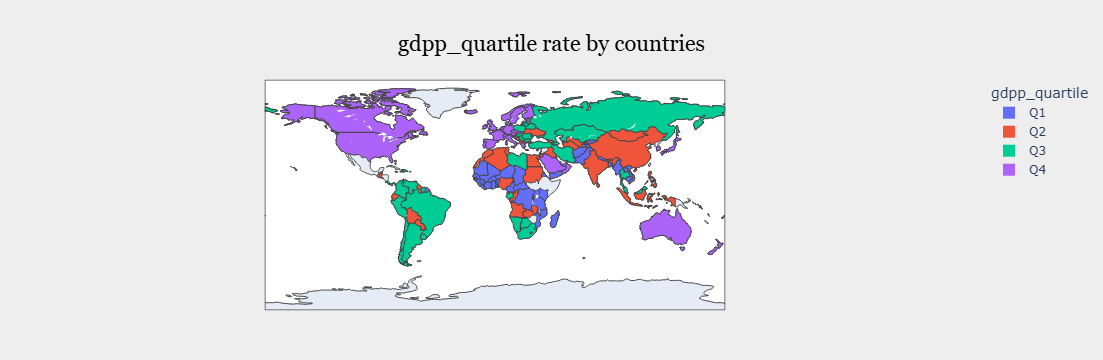

In [18]:
# The status of different features in each "country" without choropleth plot
import plotly.express as px
# Plasma
for i in df.columns[1:]:
    fig=px.choropleth(
        data_frame=df,
        locationmode='country names',
        locations='country',
        color_continuous_scale='Viridis',   
        color=i,
        title=f'{i} rate by countries')
        
    fig.update_layout(
        margin={"r":20,"t":80,"l":20,"b":50},
        title=dict(
            y=0.9,
            x=0.5,
            xanchor= 'center',
            yanchor= 'top'
            ),
        titlefont=dict(
            family='Georgia',
            size=22,
            color='black',),
        paper_bgcolor='#eeeeee')

    fig.show()

# Feature Engineering

In [20]:
df['trade_balance'] = df['exports'] - df['imports']

df['health_risk'] = df['child_mort'] / df['life_expec']

df['economic_stability'] = df['gdpp'] / df['inflation']

df['social_stability'] = df['life_expec'] / df['total_fer']

In [21]:
# Display the new column
print(df[['country', 'trade_balance', 'health_risk', 'economic_stability', 'social_stability']])

                 country  trade_balance  health_risk  economic_stability  \
0            Afghanistan          -34.9     1.604982           58.580508   
1                Albania          -20.6     0.217562          910.913140   
2                Algeria            7.0     0.356863          277.018634   
3                 Angola           19.4     1.980033          157.589286   
4    Antigua and Barbuda          -13.4     0.134115         8472.222222   
..                   ...            ...          ...                 ...   
162              Vanuatu           -6.1     0.463492         1133.587786   
163            Venezuela           10.9     0.226790          294.117647   
164              Vietnam           -8.2     0.318741          108.264463   
165                Yemen           -4.4     0.834074           55.508475   
166               Zambia            6.1     1.598077          104.285714   

     social_stability  
0            9.656357  
1           46.242424  
2           26.

In [22]:
def classify_country(data):
    aid_criteria_count = 0
    
    if data['child_mort'] > 50: 
        aid_criteria_count += 1
    if data['income'] < 2000:  
        aid_criteria_count += 1
    if data['gdpp'] < 5000: 
        aid_criteria_count += 1
    if data['inflation'] > 10: 
        aid_criteria_count += 1
    if data['life_expec'] < 65: 
        aid_criteria_count += 1
    if data['health'] < 5: 
        aid_criteria_count += 1
    if data['imports'] > 50: 
        aid_criteria_count += 1
    if data['exports'] < 10: 
        aid_criteria_count += 1
    if data['total_fer'] > 4: 
        aid_criteria_count += 1
    if data['health_risk'] > 50:
        aid_criteria_count += 1
    if data['economic_stability'] < 50:
        aid_criteria_count += 1
    if data['trade_balance'] < 0:
        aid_criteria_count += 1
    if data['social_stability'] < 50:
        aid_criteria_count += 1
    
    if aid_criteria_count >= 3:
        return 1  # needs aid
    else:
        return 0  # Does not need aid

df['needs_aid'] = df.apply(classify_country, axis=1)

print(df[['country', 'needs_aid']])

                 country  needs_aid
0            Afghanistan          1
1                Albania          1
2                Algeria          1
3                 Angola          1
4    Antigua and Barbuda          1
..                   ...        ...
162              Vanuatu          1
163            Venezuela          1
164              Vietnam          1
165                Yemen          1
166               Zambia          1

[167 rows x 2 columns]


In [23]:
# Check the number of unique in column
df['needs_aid'].nunique()

2

In [24]:
# Filter the DataFrame for countries with needs_aid equal to zero
countries_needing_no_aid = df[df['needs_aid'] == 0]

# Display the results
print("-----------------Countries with needs_aid == 0:--------------------")
print(countries_needing_no_aid[['country', 'needs_aid']])

-----------------Countries with needs_aid == 0:--------------------
                country  needs_aid
5             Argentina          0
7             Australia          0
8               Austria          0
9            Azerbaijan          0
13             Barbados          0
15              Belgium          0
22               Brazil          0
29               Canada          0
33                Chile          0
34                China          0
35             Colombia          0
39           Costa Rica          0
41              Croatia          0
42               Cyprus          0
43       Czech Republic          0
44              Denmark          0
45   Dominican Republic          0
51              Estonia          0
53              Finland          0
54               France          0
58              Germany          0
60               Greece          0
61              Grenada          0
67              Hungary          0
68              Iceland          0
71                 Ira

In [25]:
count_no_aid = (df['needs_aid'] == 0).sum()  # Counts all entries where needs_aid is 0
print(f"Number of countries that do not need aid: {count_no_aid}")

Number of countries that do not need aid: 53


In [26]:
count_aid = (df['needs_aid'] == 1).sum()  # Counts all entries where needs_aid is 1
print(f"Number of countries that do not need aid: {count_aid}")

Number of countries that do not need aid: 114


# DECISION TREE CLASSIFIER

In [28]:
# Declare the Target and Features
x = df.drop(columns=['country', 'needs_aid','gdpp_quartile'])
y = df['needs_aid']

In [29]:
print(x.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  trade_balance  health_risk  economic_stability  \
0       5.82    553          -34.9     1.604982           58.580508   
1       1.65   4090          -20.6     0.217562          910.913140   
2       2.89   4460            7.0     0.356863          277.018634   
3       6.16   3530           19.4     1.980033          157.589286   
4       2.13  12200          -13.4     0.134115         8472.222222   

   social_stability  
0          9.656357  
1         46.242424  
2         26.470588  
3          9.756494  
4         36.05633

In [30]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: needs_aid, dtype: int64


In [31]:
# Split the data for training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
# initilizing the Decision Tree Classifier and fit the model

from sklearn.tree import DecisionTreeClassifier

Dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
Dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
y_pred = Dtc.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7941176470588235


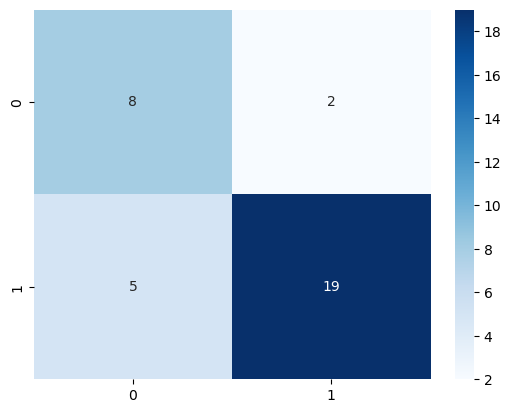

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.show();

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.90      0.79      0.84        24

    accuracy                           0.79        34
   macro avg       0.76      0.80      0.77        34
weighted avg       0.82      0.79      0.80        34



# RANDOM FOREST CLASSIFIER

In [38]:
# Declare the dependent and independent variable
x = df.drop(columns=['country', 'needs_aid','gdpp_quartile'])
y = df['needs_aid']

In [39]:
# Split the data for training and testing

from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

In [41]:
# Initialize the Random Forest Classifier and fit the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [42]:
# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9411764705882353


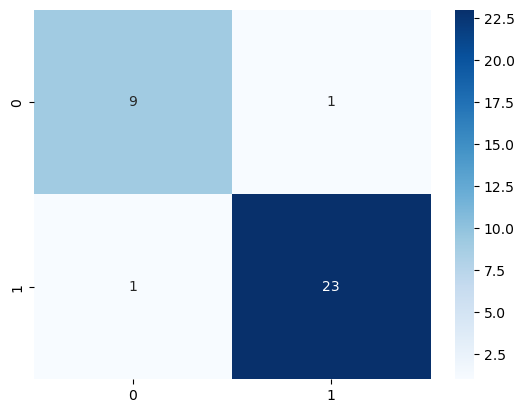

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.show();

In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.96      0.96      0.96        24

    accuracy                           0.94        34
   macro avg       0.93      0.93      0.93        34
weighted avg       0.94      0.94      0.94        34



# SUPPORT VECTOR MACHINE

In [47]:
# Declare the Target and Features
x = df.drop(columns=['country', 'needs_aid','gdpp_quartile'])
y = df['needs_aid']

In [48]:
# Scale the features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [49]:
# Split the data for training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [50]:
# Initialize the Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf') 
svm.fit(x_train, y_train)

SVC()

In [51]:
# Make predictions
y_pred = svm.predict(x_test)

In [52]:
# Evaluate the model

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8823529411764706


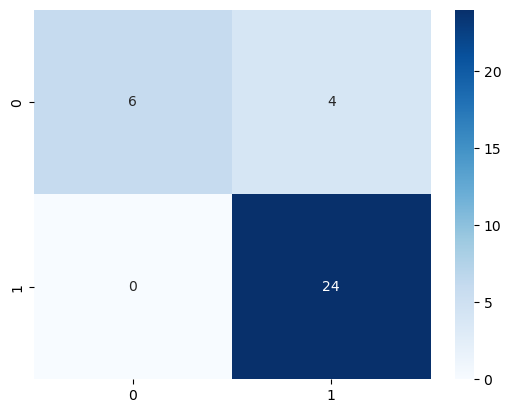

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.show();

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.86      1.00      0.92        24

    accuracy                           0.88        34
   macro avg       0.93      0.80      0.84        34
weighted avg       0.90      0.88      0.87        34



# CONCLUSION
## From the above three model
<p>DecisionTreeClassifier Accuracy is 0.7941176470588235 <br>
Random Forest Classifier Accuracy is 0.9411764705882353 <br>
Support Vector Machine Accuracy is 0.8823529411764706 </p>

### The Best Accuracy is .94 which is obtained by Random Forest Classifier

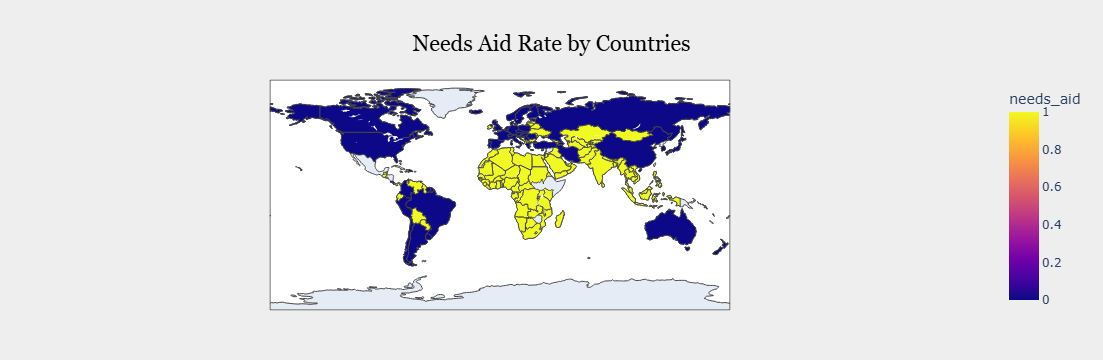

In [56]:
# Plot only for the 'needs_aid' column 
fig = px.choropleth(
    data_frame=df,
    locationmode='country names',
    locations='country',
    color_continuous_scale='Plasma',
    color='needs_aid',  
    title='Needs Aid Rate by Countries'
)

fig.update_layout(
    margin={"r": 20, "t": 80, "l": 20, "b": 50},
    title=dict(
        y=0.9,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    titlefont=dict(
        family='Georgia',
        size=22,
        color='black',
    ),
    paper_bgcolor='#eeeeee'
)

fig.show()


# Prediction

In [58]:
def check_aid_by_country(country_name):
    country_data = df[df['country'] == country_name]
    if country_data.empty:
        return f"{country_name} not found in the dataset."
    
    needs_aid = country_data['needs_aid'].values[0]
    if needs_aid == 1:
        return f"{country_name} needs aid."
    else:
        return f"{country_name} does not need aid."


# Prediction using the user input

In [60]:

user_input = input("Enter a country name: ")
print(check_aid_by_country(user_input))

Enter a country name:  Algeria


Algeria needs aid.
